# Model_2_Pose_Estimation_YOLOv8

# Introduction

For the Post Estimation I will use ultralytics YOLOv8 = https://docs.ultralytics.com/

Dataset used: COCO-Pose dataset (https://cocodataset.org/#keypoints-2017)

| Metric         | size(pixels) | mAPpose 50 | Speed CPU ONNX (ms)|
|----------------|--------------|-------------|-------------------|
| YOLOv8n-pose   | 640          | 80.1       |  131.8             |
| YOLOv8s-pose   | 640          | 86.2       |  233.2	          |
|YOLOv8m-pose    | 640          | 88.8       |  456.3	          |
|YOLOv8l-pose    | 640          | 90.0       |  784.5	          |
| YOLOv8x-pose   | 640          | 90.2       |  1607.1	          |
| YOLOv8x-pose-p6| 1280         | 91.2       |  4088.7	          |

Metric source: https://docs.ultralytics.com/datasets/pose/coco/


In [1]:
# installing ultralytics it is recommended to use a virtual environment
!pip install ultralytics

In [2]:
# importing YOLO = You Only Look Once
from ultralytics import YOLO

In [3]:
# this is a pretrained model for post estimation 
# more models for YOLOV8 can be found here https://docs.ultralytics.com/models/yolov8/#performance-metrics
# more models for YOLOV8 post estimation can be found here https://docs.ultralytics.com/tasks/pose/
model = YOLO('yolov8n-pose.pt') 

In [4]:
model.info()

YOLOv8n-pose summary: 250 layers, 3295470 parameters, 0 gradients


(250, 3295470, 0, 0.0)

In [5]:
print(model)

YOLO(
  (model): PoseModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=

In [6]:
# Predict with the model
# predict on an image and with the save argument it will save it inside a folder with the skeletal overlay
results = model('https://raw.githubusercontent.com/Abyza/Project_Exercise_Posture_Correction/main/Creation_of_Models/Sample_Images/paulo3.png', save=True)  

100%|██████████| 98.5k/98.5k [00:00<00:00, 20.1MB/s]


image 1/1 d:\datasci\projectFiles\yolo_postestimation\paulo3.png: 640x640 1 person, 134.1ms
Speed: 9.0ms preprocess, 134.1ms inference, 1009.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\pose\predict14


In [7]:
import os

# Get the current working directory
current_dir = os.getcwd()

print("Current working directory:", current_dir)


Current working directory: d:\datasci\projectFiles\yolo_postestimation


In [12]:
# sample image taken online
results = model(f'{current_dir}/paulo3.png', save=True) 


image 1/1 d:\datasci\projectFiles\yolo_postestimation\paulo3.png: 640x640 1 person, 74.0ms
Speed: 5.0ms preprocess, 74.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\pose\predict14


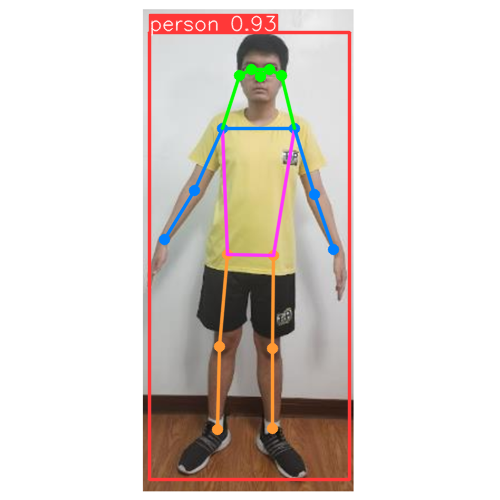

In [13]:
from PIL import Image

# Display the resulting image
Image.open(Rf'{current_dir}\runs\pose\predict14\paulo3.png') 

In [14]:
# more details about keypoints can be found here https://docs.ultralytics.com/modes/predict/#keypoints
# .xyn is normalized # xy is pixel coordinates
results[0].keypoints.xyn

tensor([[[0.5211, 0.1539],
         [0.5396, 0.1381],
         [0.5038, 0.1380],
         [0.5640, 0.1507],
         [0.4786, 0.1509],
         [0.5889, 0.2580],
         [0.4446, 0.2565],
         [0.6282, 0.3885],
         [0.3899, 0.3811],
         [0.6675, 0.4988],
         [0.3299, 0.4790],
         [0.5477, 0.5108],
         [0.4550, 0.5083],
         [0.5440, 0.6973],
         [0.4392, 0.6923],
         [0.5460, 0.8572],
         [0.4346, 0.8586]]])

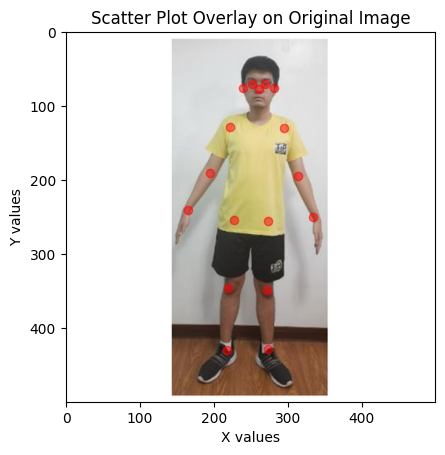

In [15]:
# Showing the image with the overlay keypoints
import matplotlib.pyplot as plt
import numpy as np

# Loading the result of the model (original image)
img_bgr = results[0].orig_img.astype(np.uint8)
# Convert BGR to RGB format
img_rgb = img_bgr[..., ::-1]
white_image = img_rgb  

# Showing the original image
plt.imshow(white_image)

# Loading the result of the model (keypoints xy)
data_tensor = results[0].keypoints.xy

# Extract x and y values from the tensor
x_values = data_tensor[:, :, 0].flatten().numpy()
y_values = data_tensor[:, :, 1].flatten().numpy()

# Showing the keypoints xy
# Red points with transparency
plt.scatter(x_values, y_values, c='red', alpha=0.5) 
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Scatter Plot Overlay on Original Image')
plt.show()

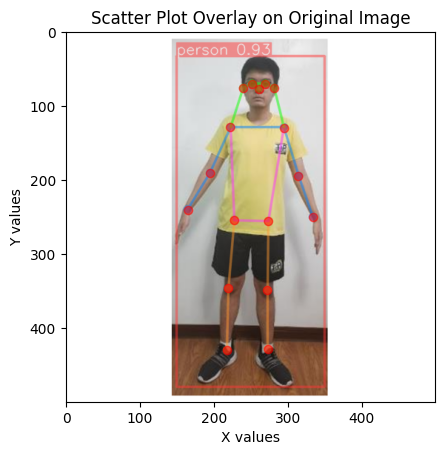

In [21]:
# Showing the image with the overlay keypoints adding the model resulting image
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Loading the result of the model (original image)
img_bgr = results[0].orig_img.astype(np.uint8)
# Convert BGR to RGB format
img_rgb = img_bgr[..., ::-1]
white_image = img_rgb  

# Showing the original image
plt.imshow(white_image)

# Loading the result of the model (keypoints xy)
data_tensor = results[0].keypoints.xy

# Extract x and y values from the tensor
x_values = data_tensor[:, :, 0].flatten().numpy()
y_values = data_tensor[:, :, 1].flatten().numpy()

# Showing the keypoints xy
# Red points with transparency
plt.scatter(x_values, y_values, c='red', alpha=0.5) 
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Scatter Plot Overlay on Original Image')

# Load and overlay PNG image
png_image = Image.open(rf'{current_dir}\runs\pose\predict14\paulo3.png')  # Change path as needed
plt.imshow(png_image, alpha = 0.5 )

plt.show()